# Schools!



To begin, I loaded the dataset containing the locations and details of public schools in Allegheny County. This dataset includes latitude and longitude coordinates for each school, which allows for spatial analysis using mapping tools like GeoPandas and Shapely. To load the dataset correctly, it was important to get the exact name that is specified in the directory and it took a while to correctly load the dataset. The tools like GeoPandas and Shapely needed to be imported into the notebook.


In [8]:
import sys
sys.path.append("/ihome/cmpinf0010_2025s/kkr33/.local/lib/python3.11/site-packages")

One of the key technical steps in this project was making sure the school coordinates (latitude and longitude) matched the format of the Pittsburgh neighborhood shapefile. The shapefile originally used a projection called EPSG:2272, which is based on feet and specific to Pennsylvania. However, the school dataset uses standard geographic coordinates (EPSG:4326), which are in degrees. In order to accurately check which neighborhood each school falls into, I had to reproject the neighborhood shapefile to EPSG:4326 so that both datasets were using the same coordinate system. Without this conversion, spatial matching wouldn't work, and schools wouldn’t be correctly assigned to neighborhoods.


In [10]:
import pandas as pd
import fpsnippets
from shapely.geometry import Point
import geopandas
schools_df = pd.read_csv('Allegheny_County_Public_Schools___Local_Education_Agency_(LEAs)_Locations.csv')

NEIGHBORHOODS = geopandas.read_file(
    "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip"
)
NEIGHBORHOODS = NEIGHBORHOODS.to_crs(epsg=4326)

This block of code defines a function called `geo_to_neighborhood`, which takes a latitude and longitude point and checks which Pittsburgh neighborhood it falls into using spatial geometry. It loops through each neighborhood in the shapefile and uses the `contains` method to see if the point is inside the neighborhood boundary. Once it finds a match, it returns the neighborhood name.

After defining the function, I applied it to every row in the school dataset using the latitude (`Y`) and longitude (`X`) columns. This created a new column called `"Neighborhood"` in the DataFrame. Finally, I used `value_counts()` to count how many schools were located in each neighborhood, and stored those results in a new DataFrame for visualization and analysis.


In [9]:
def geo_to_neighborhood(latitude, longitude):
    pt = Point(longitude, latitude)
    for _idx, neighborhood in NEIGHBORHOODS.iterrows():
        if neighborhood["geometry"].contains(pt):
            return neighborhood["hood"]
    return None
schools_df["Neighborhood"] = schools_df.apply(
lambda row: geo_to_neighborhood(row["Y"], row["X"]),
axis=1
)
school_counts = schools_df["Neighborhood"].value_counts().reset_index()
school_counts.columns = ["Neighborhood", "School Count"]


Here I tested if the function was mapping coordinates correctly, and it did!

In [30]:
geo_to_neighborhood(40.440624, -79.995888)

'Central Business District'

# Visualization of public schools in each Pittsburgh neighborhood


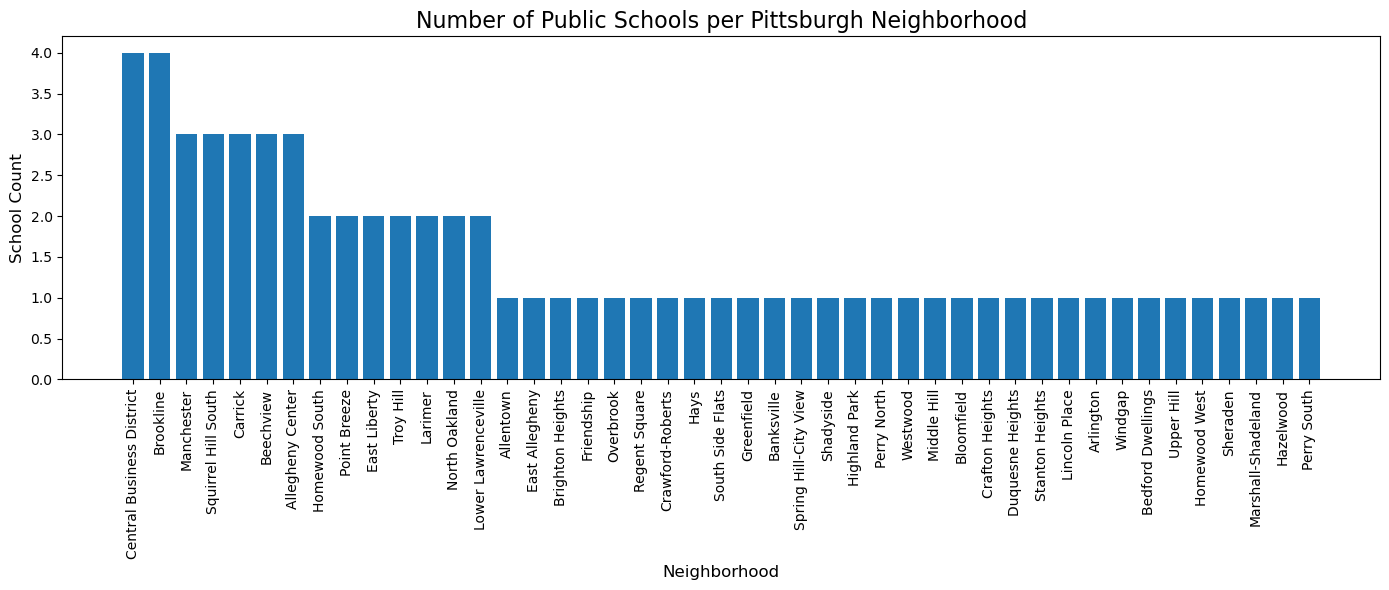

In [8]:
import matplotlib.pyplot as plt

school_counts_sorted = school_counts.sort_values(by="School Count", ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(school_counts_sorted["Neighborhood"], school_counts_sorted["School Count"])
plt.title("Number of Public Schools per Pittsburgh Neighborhood", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("School Count", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualization of the top 10 neighborhoods with the most public schools


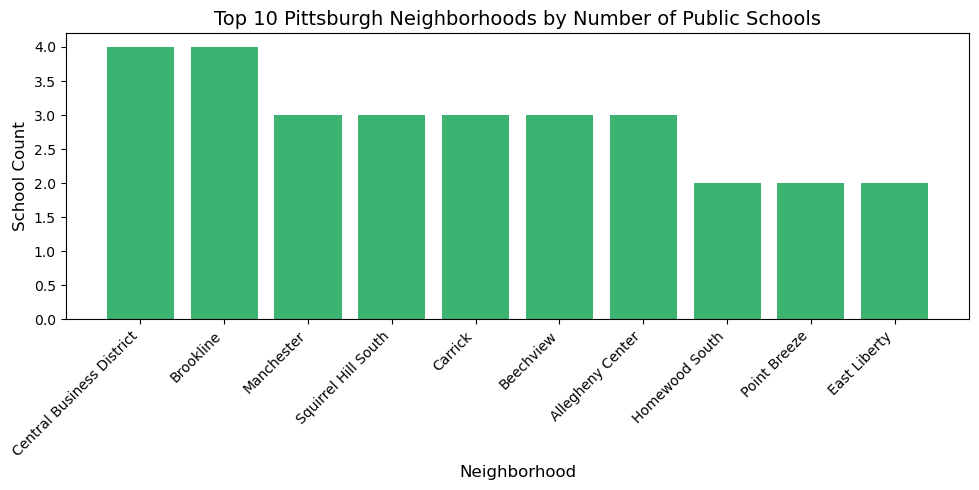

In [6]:
import matplotlib.pyplot as plt

top10 = school_counts.sort_values(by="School Count", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top10["Neighborhood"], top10["School Count"], color="mediumseagreen")
plt.title("Top 10 Pittsburgh Neighborhoods by Number of Public Schools", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("School Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tabular representation of the number of public schools in each Pittsburgh neighborhood


In [5]:
school_table = school_counts.sort_values(by="School Count", ascending=False).reset_index(drop=True)

import pandas as pd
from IPython.display import display

display(school_table)

,Neighborhood,School Count
0,Central Business District,4
1,Brookline,4
2,Manchester,3
3,Squirrel Hill South,3
4,Carrick,3
5,Beechview,3
6,Allegheny Center,3
7,Homewood South,2
8,Point Breeze,2
9,East Liberty,2
